In [3]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
from IPython.display import clear_output

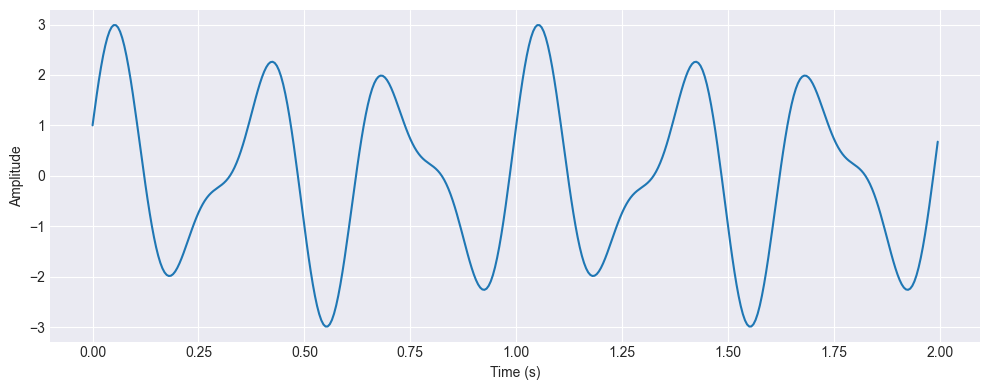

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling settings
fs = 200 # Sampling frequency in Hz
T = 2     # Duration in seconds
t = np.linspace(0, T, int(fs*T), endpoint=False)  # Time vector

# Create sine waves
freqs = [3, 5]           # Frequencies in Hz
amps = [2.0, 1.0]        # Amplitudes for each frequency
phases = [np.pi/6, 0]
signal = np.sum([a * np.sin(2 * np.pi * f * t + p) for a, p, f in zip(amps, phases, freqs)], axis=0)

# Plot the combined signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [192]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


import matplotlib.pyplot as plt
import numpy as np

fig,axs = plt.subplots(1, 2, figsize=(12, 6))

f = 8 # cycles per second or Hz
omega = 2 * np.pi * f # radians per second
total_duration = T*1000 # total signal duration in milliseconds
sampling_interval = int(1000/fs)
times = list(range(0, total_duration, sampling_interval)) # sampling times in milliseconds

axs[0].axhline(0, color='gray', linewidth=0.5)
axs[0].axvline(0, color='gray', linewidth=0.5)
axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-3, 3)
#axs.set_gca().set_aspect('equal', adjustable='box')
axs[0].set_xlabel('Real')
axs[0].set_ylabel('Imaginary')
axs[0].grid(True)

total_x, total_y = 0, 0
total_x_vals = []
total_y_vals = []
total_vals = []
quiver_obj = None

def update(i):
    t = times[i]
    s = signal[i]
    theta =  (omega * t / 1000) % (2 * np.pi)  *  - 1# angle in radians
    z = s*np.exp(1j*theta) 
    x, y = z.real, z.imag
    global total_x, total_y, quiver_obj
    total_x += x
    total_x_vals.append(total_x)
    total_y += y
    total_y_vals.append(total_y)
    total_mag = np.sqrt(total_x**2 + total_y**2)
    total_vals.append(total_mag)

    #axs.cla()
    axs[0].plot(x, y, 'o', color='gray', markersize=5)
    #if quiver_obj is not None:
    #    quiver_obj.remove()
    #quiver_obj = axs[0].quiver(0, 0, total_x, total_y, angles='xy', scale_units='xy', scale=1)
    #axs.text(x * 1.05, y * 1.05, f"$z = {abs(z):.2f}e^{{i{np.angle(z):.2f}}}$", fontsize=12)
    axs[0].set_title(f"f: {f:0.2f}, Omega: {omega:0.2f}, Theta: {theta/np.pi:0.2f} pi, Time:{t:5} ms ")
    #axs[1].plot(total_x_vals)
    #axs[1].plot(total_y_vals)
    axs[1].plot(total_vals)


ani = FuncAnimation(fig, update, frames=list(range(len(times))), interval=sampling_interval, repeat=True)
plt.close(fig)
video_html = ani.to_html5_video().replace('<video', '<video muted')
HTML(video_html)